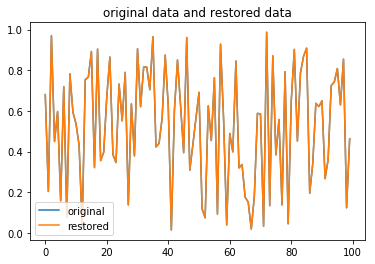

In [10]:
import wave
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

class DCT:
    def __init__(self,N):
        self.N = N	# データ数．
        # 1次元離散コサイン変換の変換行列を予め作っておく
        self.phi_1d = np.array([ self.phi(i) for i in range(self.N) ])

    def dct(self,data):
        """ 1次元離散コサイン変換を行う """
        return self.phi_1d.dot(data)

    def idct(self,c):
        """ 1次元離散コサイン逆変換を行う """
        return np.sum( self.phi_1d.T * c ,axis=1)

    def phi(self,k):
        """ 離散コサイン変換(DCT)の基底関数 """
        # DCT-II
        if k == 0:
            return np.ones(self.N)/np.sqrt(self.N)
        else:
            return np.sqrt(2.0/self.N)*np.cos((k*np.pi/(2*self.N))*(np.arange(self.N)*2+1))
        # DCT-IV(試しに実装してみた)
        #return np.sqrt(2.0/N)*np.cos((np.pi*(k+0.5)/self.N)*(np.arange(self.N)+0.5))

if __name__=="__main__":
    N = 100			# データ数を100とします
    dct = DCT(N)	# 離散コサイン変換を行うクラスを作成

    x = np.random.random_sample(N)	# N個の乱数データを作成
    c = dct.dct(x)					# 離散コサイン変換を実行
    y = dct.idct(c)					# 離散コサイン逆変換を実行


    # 元のデータ(x)と復元したデータ(y)をグラフにしてみる
    plt.plot(x,label="original")
    plt.plot(y,label="restored")
    plt.legend()
    plt.title("original data and restored data")
    plt.show()

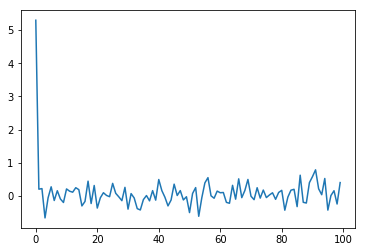

In [11]:
plt.plot(c)

In [20]:
wf = wave.open("1.wav" , "r" )
buf = wf.readframes(wf.getnframes())
# バイナリデータを16bit整数に変換
data = np.frombuffer(buf, dtype="int16") # 16 kHz?

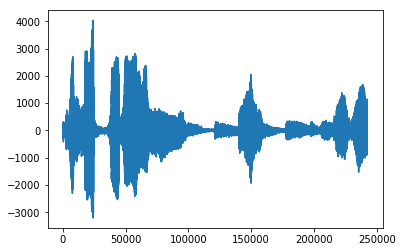

In [21]:
plt.plot(data)